In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./수명주기붙힌거.csv',encoding='cp949')
# df['거래소코드'] = df['거래소코드'].astype(int)
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
# df['회계년도'] = df['회계년도'].astype(int)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청 한국표준산업분류 10차(세세분류),회생기업1,회생기업2
0,(주)CMG제약,58820,201112,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,1,0,0,0,0,0,1,의약품 제조업,0,0
1,(주)디아크,78590,201112,10.43,13.04,1.71,35.94,29.14,47.52,14.36,...,0,0,0,0,0,0,4,그 외 자동차용 신품 부품 제조업,0,0
2,(주)옵트론텍,82210,201112,2.39,3.11,0.01,4.78,21.79,-6.84,21.81,...,0,0,0,0,0,1,3,사진장비 및 광학기기 제조업,0,0
3,상신이디피(주),91580,201112,6.82,11.97,19.54,3.13,20.61,37.83,14.77,...,0,0,0,0,0,0,2,축전지 제조업,0,0
4,(주)오픈베이스,49480,201112,4.26,1.83,-0.28,4.69,3.74,38.02,22.83,...,0,0,0,0,0,0,2,컴퓨터시스템 통합 자문 및 구축 서비스업,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,(주)에스에이엠티,31330,201912,14.78,-11.14,-7.71,-20.47,11.28,3.22,4.21,...,0,0,0,0,0,0,3,수송용 운송장비 도매업,0,0
8744,에스디엔(주),99220,201912,1.17,15.14,29.09,23.35,13.58,6.79,26.67,...,0,0,0,0,0,1,2,수송용 운송장비 도매업,0,0
8745,(주)에스에이티,60540,201912,11.61,9.86,-0.54,17.31,9.02,4.65,16.69,...,0,0,0,0,0,0,2,기기용 자동측정 및 제어장치 제조업,0,0
8746,(주)에스비에스,34120,201912,1.97,30.29,2.62,45.27,13.83,-10.54,19.61,...,0,1,0,0,0,0,5,지상파 방송업,0,0


In [24]:
data = df.iloc[:,4:49]
target = df.iloc[:,58]

In [25]:
data

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,...,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R & D 투자효율
0,1.98,-5.90,17.64,-2.02,56.40,41.83,-8.50,-8.28,2.37,3.61,...,35.59,28.23,71726.36,29216.43,202.26,35.858193,12.72,19.56,25719.78,0.13
1,13.04,1.71,35.94,29.14,47.52,14.36,6.72,45.64,0.00,0.00,...,63.26,6.42,46885.79,55375.63,131.56,0.000000,0.00,0.00,0.00,0.90
2,3.11,0.01,4.78,21.79,-6.84,21.81,6.67,11.09,7.53,11.79,...,-477.39,-4.35,352937.97,332835.13,971.48,45.597681,16.57,26.34,160931.53,0.89
3,11.97,19.54,3.13,20.61,37.83,14.77,4.70,15.46,11.58,7.41,...,3985.44,0.36,211780.30,202225.95,390.06,63.691405,34.58,23.37,134885.85,1.27
4,1.83,-0.28,4.69,3.74,38.02,22.83,1.20,3.60,2.82,1.82,...,13.93,31.29,56112.04,0.00,848.82,481.094118,31.80,20.74,269951.71,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,-11.14,-7.71,-20.47,11.28,3.22,4.21,3.10,16.62,11.10,2.78,...,39.61,43.99,131847.10,0.00,3139.77,0.000000,18.71,4.40,587501.65,0.00
8744,15.14,29.09,23.35,13.58,6.79,26.67,6.14,5.59,2.34,4.55,...,-3397.43,-0.28,241140.82,99921.36,1119.44,49.758793,10.72,22.33,119988.76,0.61
8745,9.86,-0.54,17.31,9.02,4.65,16.69,6.80,11.20,7.74,7.13,...,57.72,14.74,467941.03,130200.61,1470.46,86.343051,27.48,26.52,404034.57,4.02
8746,30.29,2.62,45.27,13.83,-10.54,19.61,2.56,3.44,1.14,1.54,...,0.81,25.96,289730.42,0.00,1158.55,104.694291,26.18,39.95,303331.21,0.41


In [26]:
target

0       0
1       0
2       0
3       0
4       0
       ..
8743    0
8744    0
8745    0
8746    0
8747    0
Name: 회생기업2, Length: 8748, dtype: int64

In [27]:
x_train = data.loc[:5611] # 2011 ~ 2016년
x_test = data.loc[5611:] # 2017 ~ 2019년
y_train = target.loc[:5611] # 2011 ~ 2016년
y_test = target.loc[5611:] # 2017 ~ 2019년

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit 
import time
import warnings
warnings.simplefilter('ignore')

In [29]:
lasso_model = Lasso()

param_grid = {'alpha' : [0.001, 0.01, 0.1, 1, 2, 5, 10]}

grid_time = time.time()
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=TimeSeriesSplit(n_splits=9))
grid_search.fit(x_train, y_train)
print('GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-grid_time))

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

GridSearchCV 수행 시간: 3.3 초


,params,mean_train_score,mean_test_score,rank_test_score
6,{'alpha': 10},0.333598,0.203123,1
5,{'alpha': 5},0.333669,0.201232,2
4,{'alpha': 2},0.333771,0.199947,3
3,{'alpha': 1},0.333866,0.199367,4
2,{'alpha': 0.1},0.335424,0.199138,5
1,{'alpha': 0.01},0.339752,0.199073,6
0,{'alpha': 0.001},0.341741,0.175141,7


In [30]:

print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'alpha': 10}
GridSearchCV 최고 정확도:0.2031


In [31]:
# grid_search.best_params_의 alpha 값
for value in grid_search.best_params_:
    bp_value = grid_search.best_params_[value]
    print(bp_value)

10


In [32]:
alpha = bp_value
lasso_time = time.time()
lasso_best = Lasso(alpha=alpha).fit(x_train, y_train)
print('Lasso 수행 시간: {0:.1f} 초'.format(time.time()-lasso_time))
print('alpha가 ', alpha, '일 때 피처 개수 : {}'.format(np.sum(lasso_best.coef_ != 0)))

Lasso 수행 시간: 0.0 초
alpha가  10 일 때 피처 개수 : 6


In [33]:
df_lasso = pd.DataFrame()
df_lasso['feature'] = x_train.columns
df_lasso['coef'] = lasso_best.coef_
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
# df_lasso.sort_values('coef', ascending=False).reset_index(drop=True)
df_lasso

,feature,coef
15,매입채무회전율,3.331037e-08
27,CASH_FLOW_대_차입금비율,-4.508612e-09
37,노동장비율,-1.859827e-10
38,기계장비율,1.417784e-10
39,자본집약도,-6.460974e-08
43,종업원1인당부가가치,3.152847e-09


In [34]:
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')

Lasso에서 선택된 피처 수 6 개


In [35]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
lasso_features

['매입채무회전율', 'CASH_FLOW_대_차입금비율', '노동장비율', '기계장비율', '자본집약도', '종업원1인당부가가치']

<Figure size 2160x1800 with 0 Axes>

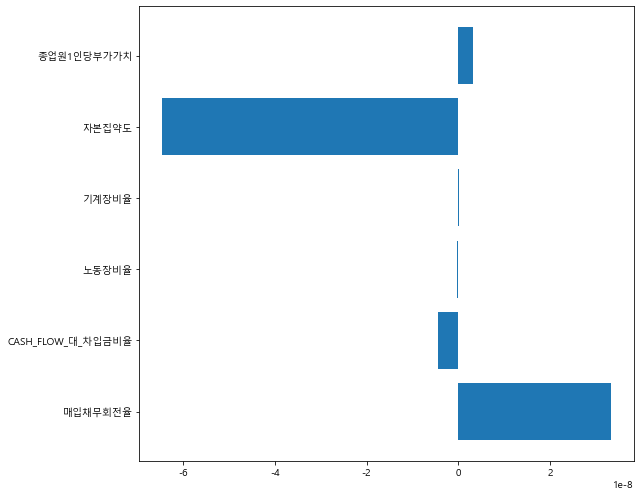

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(30,25))

fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(np.arange(len(df_lasso)), df_lasso['coef'])
idx = np.arange(len(df_lasso))
ax.set_yticks(idx)
ax.set_yticklabels(df_lasso['feature'])
fig.tight_layout()
plt.show()

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_time = time.time()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe.fit(x_train, y_train)
print('RFE 수행시간: {0:.1f}초'.format(time.time()-rfe_time))

rfe_scores = pd.DataFrame()
rfe_scores['Feature'] = x_train.columns
rfe_scores['Support'] = rfe.get_support()

rfe_scores

RFE 수행시간: 1.9초


,Feature,Support
0,총자산증가율,False
1,유형자산증가율,False
2,유동자산증가율,False
3,자기자본증가율,False
4,매출액증가율,False
5,매출액총이익율,False
6,매출액순이익율,False
7,자기자본순이익율,True
8,총자본영업이익율,True
9,매출액영업이익률,True


In [38]:
rfe_support = rfe.get_support()
rfe_feature = x_train.loc[:,rfe_support].columns.tolist()
rfe_feature

['자기자본순이익율',
 '총자본영업이익율',
 '매출액영업이익률',
 '자기자본회전율',
 '타인자본회전율',
 '유동자산회전율',
 '부채비율',
 '자기자본구성비율',
 '당좌자산구성비율',
 '유동자산구성비율',
 '유동부채비율',
 '타인자본구성비율',
 '순운전자본비율',
 '부가가치율',
 'R & D 투자효율']

([<matplotlib.axis.YTick at 0x21ac706e580>], [Text(0, 0, '')])

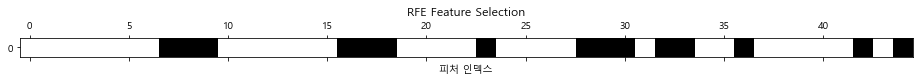

In [39]:
plt.matshow(rfe_support.reshape(1, -1), cmap = 'gray_r')
plt.title('RFE Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def stepwise_feature_selection(X_train, y_train, variables=x_train.columns.tolist()):
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            pr_squared = sm.Logit(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).prsquared
            r_squared.append(pr_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,r_squared, marker='o')
    
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables, sv_per_step

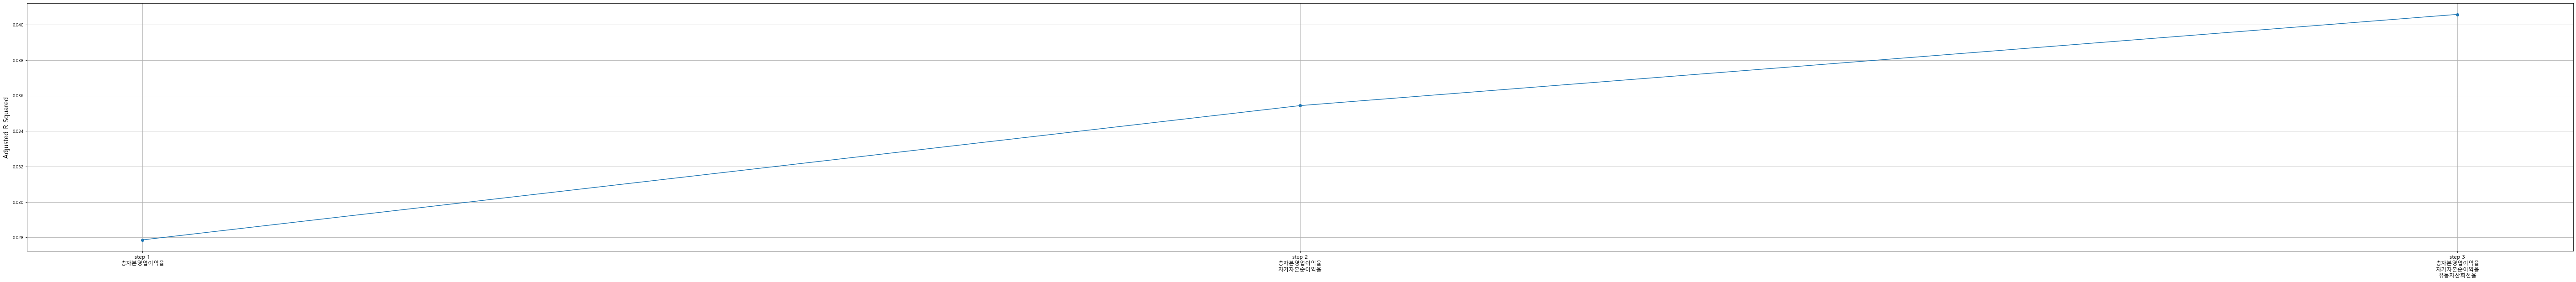

In [41]:
selected_variables, sv_per_step = stepwise_feature_selection(x_train, y_train)

In [42]:
sv_per_step[-1]

['총자본영업이익율', '자기자본순이익율', '유동자산회전율']

In [43]:
print('Stepwise에서 선택된 피처 수: {0:1.0f}'.format(len(sv_per_step[-1])), '개')

Stepwise에서 선택된 피처 수: 3 개


In [44]:
df_stepwise = pd.DataFrame()
df_stepwise['feature'] = sv_per_step[-1]
df_stepwise

,feature
0,총자본영업이익율
1,자기자본순이익율
2,유동자산회전율


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

f_classif_time = time.time()

f_classif_selector = SelectKBest(f_classif, k=20)
f_classif_selector.fit(x_train, y_train)
print('SelectKBest f_classif 수행시간: {0:.1f}초'.format(time.time()-f_classif_time))

f_classif_scores = pd.DataFrame()
f_classif_scores['Feature'] = x_train.columns
f_classif_scores['Support'] = f_classif_selector.get_support()

f_classif_scores

SelectKBest f_classif 수행시간: 0.0초


,Feature,Support
0,총자산증가율,False
1,유형자산증가율,True
2,유동자산증가율,False
3,자기자본증가율,False
4,매출액증가율,False
5,매출액총이익율,False
6,매출액순이익율,True
7,자기자본순이익율,True
8,총자본영업이익율,True
9,매출액영업이익률,True


In [47]:
f_classif_support = f_classif_selector.get_support()
f_classif_feature = x_train.loc[:, f_classif_support].columns.tolist()
f_classif_feature

['유형자산증가율',
 '매출액순이익율',
 '자기자본순이익율',
 '총자본영업이익율',
 '매출액영업이익률',
 '총자본순이익률',
 '총자본회전율',
 '유형자산회전율',
 '자기자본회전율',
 '타인자본회전율',
 '유동자산회전율',
 '유동자산구성비율',
 '재고자산_대_유동자산비율',
 '노동장비율',
 '기계장비율',
 '자본집약도',
 '총자본투자효율',
 '부가가치율',
 '종업원1인당부가가치',
 'R & D 투자효율']

([<matplotlib.axis.YTick at 0x21ac8620790>], [Text(0, 0, '')])

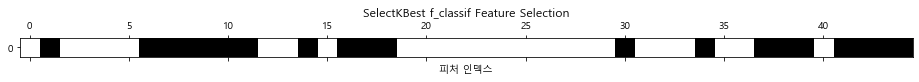

In [48]:
plt.matshow(f_classif_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectKBest f_classif Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

chi_time = time.time()

mm_X_train = MinMaxScaler().fit_transform(x_train)
chi_selector = SelectKBest(chi2, k=20)
chi_selector.fit(mm_X_train, y_train)
print('SelectKBest chi 수행시간: {0:.1f}초'.format(time.time()-chi_time))

chi_scores = pd.DataFrame()
chi_scores['Feature'] = x_train.columns
chi_scores['Support'] = chi_selector.get_support()

chi_scores

SelectKBest chi 수행시간: 0.0초


,Feature,Support
0,총자산증가율,False
1,유형자산증가율,True
2,유동자산증가율,False
3,자기자본증가율,False
4,매출액증가율,False
5,매출액총이익율,False
6,매출액순이익율,False
7,자기자본순이익율,False
8,총자본영업이익율,True
9,매출액영업이익률,False


In [50]:
chi_support = chi_selector.get_support()
chi_feature = x_train.loc[:, chi_support].columns.tolist()
chi_feature

['유형자산증가율',
 '총자본영업이익율',
 '총자본순이익률',
 '총자본회전율',
 '재고자산회전율',
 '유형자산회전율',
 '매입채무회전율',
 '타인자본회전율',
 '유동자산회전율',
 '당좌비율',
 '부채비율',
 '차입금의존도',
 '유동자산구성비율',
 '유동부채비율',
 '재고자산_대_유동자산비율',
 '노동장비율',
 '기계장비율',
 '자본집약도',
 '종업원1인당부가가치',
 'R & D 투자효율']

([<matplotlib.axis.YTick at 0x21ac99eb280>], [Text(0, 0, '')])

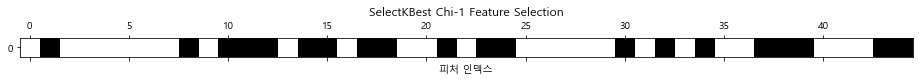

In [51]:
plt.matshow(chi_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectKBest Chi-1 Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_lr_time = time.time()
sfm_lr = SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'), max_features=20).fit(x_train, y_train)
sfm_lr.fit(x_train, y_train)
print('SelectFromModel LogisticRegression 수행시간: {0:.1f}초'.format(time.time()-sfm_lr_time))

sfm_lr_scores = pd.DataFrame()
sfm_lr_scores['Feature'] = x_train.columns
sfm_lr_scores['Support'] = sfm_lr.get_support()

sfm_lr_scores

SelectFromModel LogisticRegression 수행시간: 16.6초


,Feature,Support
0,총자산증가율,False
1,유형자산증가율,False
2,유동자산증가율,False
3,자기자본증가율,False
4,매출액증가율,False
5,매출액총이익율,False
6,매출액순이익율,False
7,자기자본순이익율,True
8,총자본영업이익율,True
9,매출액영업이익률,True


In [54]:
sfm_lr_support = sfm_lr.get_support()
sfm_lr_feature = x_train.loc[:,sfm_lr_support].columns.tolist()
sfm_lr_feature

['자기자본순이익율',
 '총자본영업이익율',
 '매출액영업이익률',
 '총자본순이익률',
 '총자본회전율',
 '매출채권회전율',
 '자기자본회전율',
 '타인자본회전율',
 '유동자산회전율',
 '당좌비율',
 '부채비율',
 '자기자본구성비율',
 '당좌자산구성비율',
 '유동자산구성비율',
 '유동부채비율',
 '타인자본구성비율',
 '재고자산_대_유동자산비율',
 '순운전자본비율',
 '총자본투자효율',
 'R & D 투자효율']

([<matplotlib.axis.YTick at 0x21ac88ffa00>], [Text(0, 0, '')])

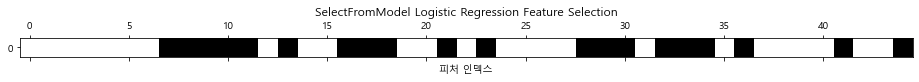

In [55]:
plt.matshow(sfm_lr_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectFromModel Logistic Regression Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

sfm_rf_time = time.time()
sfm_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, max_features=20))
sfm_rf.fit(x_train, y_train)
print('SelectFromModel RandomForest 수행시간: {0:.1f}초'.format(time.time()-sfm_rf_time))

sfm_rf_scores = pd.DataFrame()
sfm_rf_scores['Feature'] = x_train.columns
sfm_rf_scores['Support'] = sfm_rf.get_support()

sfm_rf_scores

SelectFromModel RandomForest 수행시간: 5.9초


,Feature,Support
0,총자산증가율,False
1,유형자산증가율,True
2,유동자산증가율,True
3,자기자본증가율,False
4,매출액증가율,True
5,매출액총이익율,False
6,매출액순이익율,True
7,자기자본순이익율,True
8,총자본영업이익율,True
9,매출액영업이익률,False


In [57]:
sfm_rf_support = sfm_rf.get_support()
sfm_rf_feature = x_train.loc[:, sfm_rf_support].columns.tolist()
sfm_rf_feature

['유형자산증가율',
 '유동자산증가율',
 '매출액증가율',
 '매출액순이익율',
 '자기자본순이익율',
 '총자본영업이익율',
 '총자본순이익률',
 '재고자산회전율',
 '매출채권회전율',
 '유형자산회전율',
 '매입채무회전율',
 '현금비율',
 '차입금의존도',
 'CASH_FLOW_대_부채비율',
 'CASH_FLOW_대_차입금비율',
 '매출채권_대_매입채무비율',
 '재고자산_대_유동자산비율',
 '재고자산_대_순운전자본비율',
 '노동장비율',
 '기계장비율',
 '자본집약도']

([<matplotlib.axis.YTick at 0x21ac8ae1850>], [Text(0, 0, '')])

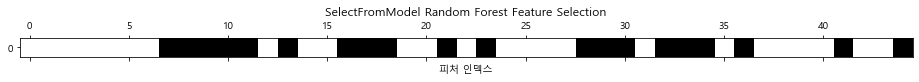

In [58]:
plt.matshow(sfm_lr_support.reshape(1, -1), cmap = 'gray_r')
plt.title('SelectFromModel Random Forest Feature Selection')
plt.xlabel('피처 인덱스')
plt.yticks([0])

In [59]:
features_df = pd.DataFrame()
features_df['Feature'] = x_train.columns
features_df['Lasso'] = ''
# features_df['f_regression'] = f_regression_scores['Support']
features_df['Stepwise'] = ''
features_df['RFE'] = rfe_scores['Support']
features_df['f_classif'] = f_classif_scores['Support']
# features_df['Chi-2'] = chi_scores['Support']
features_df['LR'] = sfm_lr_scores['Support']
features_df['RF'] = sfm_rf_scores['Support']

count = features_df[['Lasso', 'Stepwise', 'RFE', 'f_classif', 'LR', 'RF']].sum(axis=1)
features_df['Total'] = count
features_df

,Feature,Lasso,Stepwise,RFE,f_classif,LR,RF,Total
0,총자산증가율,,,False,False,False,False,0
1,유형자산증가율,,,False,True,False,True,2
2,유동자산증가율,,,False,False,False,True,1
3,자기자본증가율,,,False,False,False,False,0
4,매출액증가율,,,False,False,False,True,1
5,매출액총이익율,,,False,False,False,False,0
6,매출액순이익율,,,False,True,False,True,2
7,자기자본순이익율,,,True,True,True,True,4
8,총자본영업이익율,,,True,True,True,True,4
9,매출액영업이익률,,,True,True,True,False,3


In [60]:
df_lasso_bool = pd.DataFrame()
df_lasso_bool['Feature'] = features_df['Feature']
df_lasso_bool['Lasso'] = ''
for i in df_lasso_bool.index:
    if df_lasso_bool.loc[i, 'Feature'] in lasso_features:
        df_lasso_bool.loc[i, 'Lasso'] = True
    else:
        df_lasso_bool.loc[i, 'Lasso'] = False
df_lasso_bool

,Feature,Lasso
0,총자산증가율,False
1,유형자산증가율,False
2,유동자산증가율,False
3,자기자본증가율,False
4,매출액증가율,False
5,매출액총이익율,False
6,매출액순이익율,False
7,자기자본순이익율,False
8,총자본영업이익율,False
9,매출액영업이익률,False


In [61]:
df_stepwise_bool = pd.DataFrame()
df_stepwise_bool['Feature'] = features_df['Feature']
df_stepwise_bool['Stepwise'] = ''
for i in df_stepwise_bool.index:
    if df_stepwise_bool.loc[i, 'Feature'] in sv_per_step[-1]:
        df_stepwise_bool.loc[i, 'Stepwise'] = True
    else:
        df_stepwise_bool.loc[i, 'Stepwise'] = False
df_stepwise_bool

,Feature,Stepwise
0,총자산증가율,False
1,유형자산증가율,False
2,유동자산증가율,False
3,자기자본증가율,False
4,매출액증가율,False
5,매출액총이익율,False
6,매출액순이익율,False
7,자기자본순이익율,True
8,총자본영업이익율,True
9,매출액영업이익률,False


In [62]:
features_df['Lasso'] = df_lasso_bool['Lasso']
features_df['Stepwise'] = df_stepwise_bool['Stepwise']
count = features_df[['Lasso', 'Stepwise','RFE', 'f_classif', 'LR', 'RF']].sum(axis=1)
features_df['Total'] = count
features_df['Total'] = features_df['Total']
features_df['Total'] = features_df['Total'].astype(int)
features_df.sort_values('Total', ascending=False).reset_index(drop=True)

,Feature,Lasso,Stepwise,RFE,f_classif,LR,RF,Total
0,자기자본순이익율,False,True,True,True,True,True,5
1,총자본영업이익율,False,True,True,True,True,True,5
2,유동자산회전율,False,True,True,True,True,False,4
3,R & D 투자효율,False,False,True,True,True,False,3
4,총자본순이익률,False,False,False,True,True,True,3
5,재고자산_대_유동자산비율,False,False,False,True,True,True,3
6,노동장비율,True,False,False,True,False,True,3
7,타인자본회전율,False,False,True,True,True,False,3
8,자기자본회전율,False,False,True,True,True,False,3
9,기계장비율,True,False,False,True,False,True,3


In [63]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Feature    45 non-null     object
 1   Lasso      45 non-null     object
 2   Stepwise   45 non-null     object
 3   RFE        45 non-null     bool  
 4   f_classif  45 non-null     bool  
 5   LR         45 non-null     bool  
 6   RF         45 non-null     bool  
 7   Total      45 non-null     int32 
dtypes: bool(4), int32(1), object(3)
memory usage: 1.5+ KB


In [64]:
# 4번 이상 겹치는 피처
feature_list = features_df['Feature'][features_df['Total'] >= 4].tolist()
feature_list

['자기자본순이익율', '총자본영업이익율', '유동자산회전율']